In [4]:
import torch
from transformers import pipeline

In [20]:
classifier = pipeline(task="sentiment-analysis",
                      model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
                      device=torch.device("cuda"))

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [21]:
classifier("We are very happy to show you the 🤗 Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [22]:
results = classifier(["We are very happy to show you the 🤗 Transformers library.",
                      "We hope you don't hate it."])

for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: POSITIVE, with score: 0.9998
label: NEGATIVE, with score: 0.5309


In [ ]:
speech_recognizer = pipeline(task="automatic-speech-recognition",
                             model="facebook/wav2vec2-base-960h",
                             device=torch.device("cuda"))

In [26]:
from datasets import load_dataset, Audio

dataset = load_dataset("PolyAI/minds14", name="en-US", split="train")
dataset = dataset.cast_column("audio", Audio(sampling_rate=speech_recognizer.feature_extractor.sampling_rate))

In [28]:
result = speech_recognizer(dataset[:4]["audio"])
print([d["text"] for d in result])

['I WOULD LIKE TO SET UP A JOINT ACCOUNT WITH MY PARTNER HOW DO I PROCEED WITH DOING THAT', "FONDERING HOW I'D SET UP A JOIN TO HELL T WITH MY WIFE AND WHERE THE AP MIGHT BE", "I I'D LIKE TOY SET UP A JOINT ACCOUNT WITH MY PARTNER I'M NOT SEEING THE OPTION TO DO IT ON THE APSO I CALLED IN TO GET SOME HELP CAN I JUST DO IT OVER THE PHONE WITH YOU AND GIVE YOU THE INFORMATION OR SHOULD I DO IT IN THE AP AN I'M MISSING SOMETHING UQUETTE HAD PREFERRED TO JUST DO IT OVER THE PHONE OF POSSIBLE THINGS", 'HOW DO I FURN A JOINA COUT']


F:\PyCharm\Venv\Lib\site-packages\transformers\models\wav2vec2\modeling_wav2vec2.py:862: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [1]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0)

In [17]:
classifier("Nous sommes très heureux de vous présenter la bibliothèque 🤗 Transformers.")

[{'label': '5 stars', 'score': 0.7272653579711914}]

In [10]:
encoding = tokenizer("We are very happy to show you the 🤗 Transformers library.")

print(encoding)

{'input_ids': [101, 11312, 10320, 12495, 19308, 10114, 11391, 10855, 10103, 100, 58263, 13299, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [18]:
pt_batch = tokenizer(["We are very happy to show you the 🤗 Transformers library.",
                      "We hope you don't hate it."],
                     padding=True,
                     truncation=True,
                     max_length=512,
                     return_tensors="pt")

In [24]:
pt_model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [25]:
pt_outputs = pt_model(**pt_batch)

In [26]:
from torch.nn import functional as f

pt_predictions = f.softmax(pt_outputs.logits, dim=-1)
print(pt_predictions)

tensor([[0.0021, 0.0018, 0.0115, 0.2121, 0.7725],
        [0.2084, 0.1826, 0.1969, 0.1755, 0.2365]], grad_fn=<SoftmaxBackward0>)


In [27]:
pt_save_directory = "./pt_save_pretrained"
tokenizer.save_pretrained(pt_save_directory)
pt_model.save_pretrained(pt_save_directory)

In [28]:
pt_model = AutoModelForSequenceClassification.from_pretrained("./pt_save_pretrained")

In [29]:
from transformers import AutoConfig

my_config = AutoConfig.from_pretrained("distilbert/distilbert-base-uncased", n_heads=12)

In [30]:
from transformers import AutoModel

my_model = AutoModel.from_config(my_config)

In [31]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

F:\PyCharm\Venv\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Xavie\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/d

In [33]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="path/to/save/folder/",
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=8,
                                  per_device_eval_batch_size=8,
                                  num_train_epochs=2, )

In [34]:
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

F:\PyCharm\Venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [35]:
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes")  # doctest: +IGNORE_RESULT

README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

F:\PyCharm\Venv\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Xavie\.cache\huggingface\hub\datasets--rotten_tomatoes. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [47]:
# 查看数据集的基本信息
print(dataset)

# 查看数据集的第一条样本
print(dataset['train'][0])

# 查看数据集中某个切分（比如训练集）的大小
print(f"训练集大小：{len(dataset['train'])}")

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})
{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .', 'label': 1}
训练集大小：8530


In [55]:
def tokenize_dataset(dataset):
    return tokenizer(dataset["text"])

dataset = dataset.map(tokenize_dataset, batched=True)

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [56]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [57]:
from transformers import Trainer

trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=dataset["train"],
                  eval_dataset=dataset["test"],
                  tokenizer=tokenizer,
                  data_collator=data_collator)  # doctest: +SKIP

In [58]:
trainer.train()

Step,Training Loss
500,0.443800
1000,0.392000
1500,0.260100
2000,0.270900


TrainOutput(global_step=2134, training_loss=0.33506568436770096, metrics={'train_runtime': 130.6202, 'train_samples_per_second': 130.608, 'train_steps_per_second': 16.337, 'total_flos': 195974132394480.0, 'train_loss': 0.33506568436770096, 'epoch': 2.0})

In [59]:
trainer.evaluate()

{'eval_loss': 0.5469068884849548,
 'eval_runtime': 1.4901,
 'eval_samples_per_second': 715.408,
 'eval_steps_per_second': 89.929,
 'epoch': 2.0}

In [77]:
test_texts = ["Fuck!", "Good!"]
inputs = tokenizer(test_texts, return_tensors="pt", padding=True, truncation=True)
model.to(torch.device("cpu"))

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [78]:
predictions = model(**inputs)
result = f.softmax(predictions.logits, dim=-1)
print(result)

tensor([[0.9582, 0.0418],
        [0.0098, 0.9902]], grad_fn=<SoftmaxBackward0>)


In [80]:
trainer.state.log_history

[{'loss': 0.4438,
  'grad_norm': 6.888044834136963,
  'learning_rate': 1.5313964386129335e-05,
  'epoch': 0.46860356138706655,
  'step': 500},
 {'loss': 0.392,
  'grad_norm': 3.0406222343444824,
  'learning_rate': 1.0627928772258671e-05,
  'epoch': 0.9372071227741331,
  'step': 1000},
 {'loss': 0.2601,
  'grad_norm': 3.0154197216033936,
  'learning_rate': 5.941893158388004e-06,
  'epoch': 1.4058106841611997,
  'step': 1500},
 {'loss': 0.2709,
  'grad_norm': 47.23124694824219,
  'learning_rate': 1.2558575445173386e-06,
  'epoch': 1.8744142455482662,
  'step': 2000},
 {'train_runtime': 130.6202,
  'train_samples_per_second': 130.608,
  'train_steps_per_second': 16.337,
  'total_flos': 195974132394480.0,
  'train_loss': 0.33506568436770096,
  'epoch': 2.0,
  'step': 2134},
 {'eval_loss': 0.5469068884849548,
  'eval_runtime': 1.4901,
  'eval_samples_per_second': 715.408,
  'eval_steps_per_second': 89.929,
  'epoch': 2.0,
  'step': 2134}]

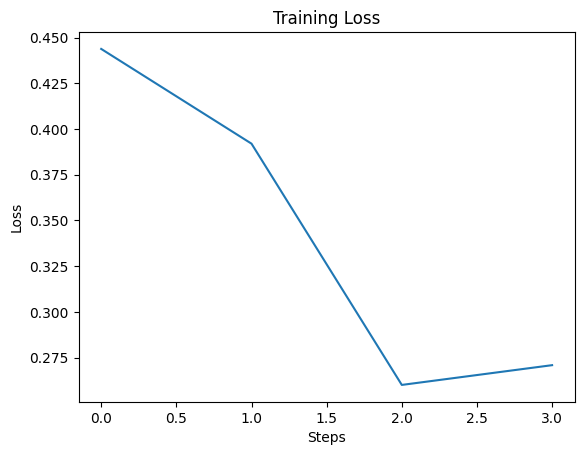

In [79]:
import matplotlib.pyplot as plt

# 从训练日志中获取损失
losses = [log["loss"] for log in trainer.state.log_history if "loss" in log]

# 绘制损失曲线
plt.plot(losses)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()
